#Goal: understand better data and improve a model

Already we have a plan how evaluate, let's focus on our data and building more advanced models.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import make_scorer
from random import shuffle

%matplotlib inline

# 1. Understand Data

1. Read data & base information
2. Distributions
3. Target variable
4. Corellation matrix

## 1.1 Read data & base information

In [4]:
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 14 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
day           10886 non-null int64
is_test       10886 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(9)
memory usage: 1.2 MB


1. We have **10 886** observations and **12** features.
2. We don't have missing value.
3. Most value is integer, few of them float and object (should be a date).

1. **datetime** - hourly date + timestamp  
2. **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
3. **holiday** - whether the day is considered a holiday
4. **workingday** - whether the day is neither a weekend nor holiday
5. **weather** - 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
6. **temp** - temperature in Celsius
7. **atemp** - "feels like" temperature in Celsius
8. **humidity** - relative humidity
9. **windspeed** - wind speed
10. **casual** - number of non-registered user rentals initiated
11. **registered** - number of registered user rentals initiated
12. **count** - number of total rentals

### Check [Five-number summary](https://en.wikipedia.org/wiki/Five-number_summary)

In [53]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,is_test
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,9.992559,0.2636414
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,5.476608,0.4406273
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,False
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,5.000000,0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,10.000000,0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,15.000000,1
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,19.000000,True


1. **count** is target variable and it changes between from **1** to **977**.
2. **registered** and **casual** there's only in training set.
3. **holiday**, **workingday** is a binary variables (0 or 1).
4. **season**, **weather** - categorical variable (1,2,3 or 4).
5. rest features is numerical variables.

## 1.2 Distributions

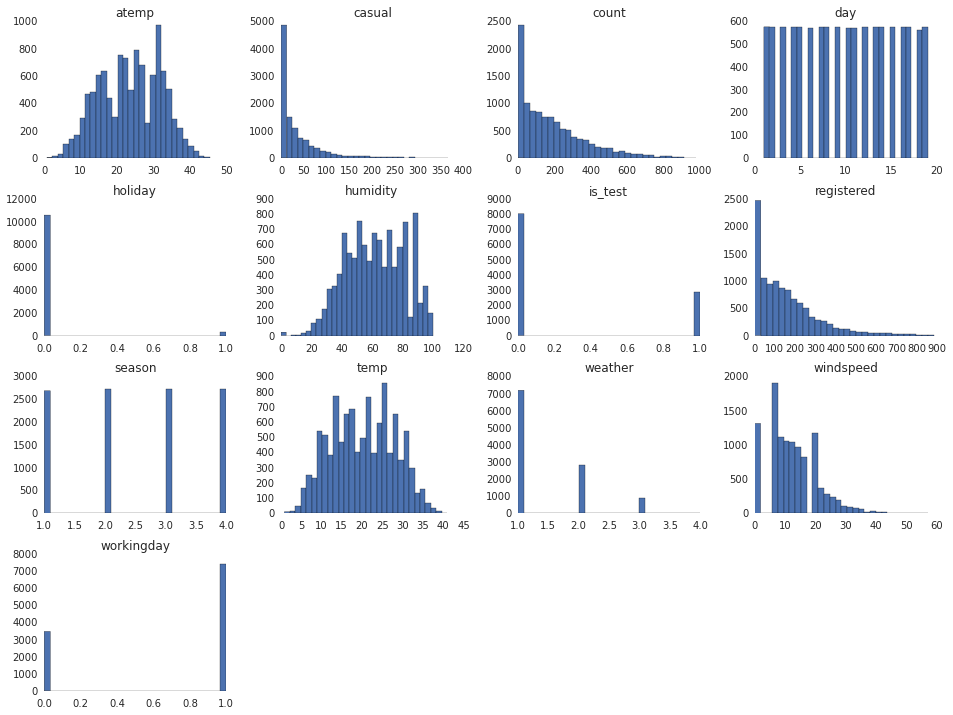

In [59]:
train.hist(figsize=(16,12),bins=30)
plt.show()

1. **atemp** have some spikes on 10,20,30 (more rounded number).
2. **count** the most value is in the first bucket and have big tail on the second right. We can try transform using log (it can be helpful).
3. **weather** looks like corelated to count of rows.
4. ** season** all buckets look comparatively equal.
5. **windspeed** there're some missing buckets between 0 and 10, and 19. Maybe it's some problem with data (human error).

## 1.3 Target variable
- we should predict **count**
- but **count** is also summary **registered** and **casual**
- do log transformation (for count and registered/casual) as well and predict it

## 1.4 Correlation matrix

# Build a model

In [7]:
model = ExtraTreesRegressor()

## train & test (data sets)
Prepare two data sets (for training and for testing):

### train data set
**X_train** - features (*matrix*).  
**y_train** - target variable (*vector*).

### test data set
**X_test** - features (*matrix*).  
**y_test** - target variable (*vector*).

In [40]:
train['datetime'] = pd.to_datetime( train['datetime'] )
train['day']      = train['datetime'].map(lambda x: x.day)
    
train.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [44]:
def train_test_split(data, last_training_day=0.3):
    days = train.day.unique()
    shuffle(days)
    test_days = days[: len(days) * 0.3]
    
    data['is_test'] = data.day.isin(test_days)
    df_train = data[data.is_test == False] 
    df_test  = data[data.is_test == True]
    
    return df_train, df_test

In [46]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
df_train, df_test = train_test_split(train)

X_train  = df_train[features].values
X_test   = df_test[features].values

y_train  = df_train['count'].values
y_test  = df_test['count'].values


model.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

# Evaluation a model

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$$

where  
**n** is the number of hours in the test set  
**pi** is your predicted count  
**ai** is the actual count  
**log(x)** is the natural logarithm  

### Why we have +1 for logarithm algorithm? Let's recall a shape logarithm function.
Argument should be greater than 0. In our case **pi** and **ai** can be equals to 0.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Binary_logarithm_plot_with_ticks.svg/408px-Binary_logarithm_plot_with_ticks.svg.png" />

### Let's play around with a quality function

|pi  |ai |  result |
|----|---|---------|
|1000| 0 | 6.909   |   
|100 | 0 | 4.615   |   
|10  | 0 | 2.397   |  
|5   | 0 | 1.792   |
|1   | 0 | 0.693   |
|0.5 | 0 | 0.405   |
|0.2 | 0 | 0.182   |
|0   | 0 | 0.0     |

For sample above `rmsle(pi, ai)` is **3.644**.
*Note: but average column result is* **2.918**.

In [49]:
def rmsle(y_true, y_pred):
    diff = np.log(y_pred + 1) - np.log(y_true + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

scorer = make_scorer(rmsle, greater_is_better=False)

In [50]:
y_pred = model.predict(X_test)
rmsle(y_test, y_pred)

1.4272746457576084

## Looks better :)
We improved evaluation a model. Next step is understand better data and figure out how we can improve result.